# BglB mutant data displayed as heat map

Here, we display the BglB data set as a heat map

In [1]:
%matplotlib inline

import pandas 
import matplotlib.pyplot as plt
from matplotlib import rc 
import numpy as np 
import math

# font preferences 
#rc( 'font', family='Source Sans Pro' )

# turn off lines for axes 
rc( 'axes', linewidth=0 )
rc( 'lines', linewidth=0 ) 

In [2]:
#! cp /Users/alex/Documents/bglb_thermal/data_set/targets.csv ../data_sets/thermal_targets.csv

In [3]:
th = pandas.read_csv('../data_sets/thermal_targets.csv', index_col=0)[['target_tm']]
th.columns = ['tm']
th.head()

,tm
mutant,
G12N,NaN
S14A,0.23
T15A,-0.76
S16A,-0.52
S16N,NaN


In [4]:
add = pandas.read_csv('../data_sets/add_features.csv', index_col=0)
add.head()

,conserved,distance,dummy
name,,,
N1A,0.228111,31.287584,0
N1C,0.228111,31.287584,0
N1D,0.228111,31.287584,0
N1E,0.228111,31.287584,0
N1F,0.228111,31.287584,0


In [5]:
df = pandas.read_csv( '../data_sets/speculative_targets.csv', index_col=0 ) 
df['position'] = [int(n[1:-1]) if n != 'BglB' else np.nan for n in df.index]
df = df.join(th).join(add)
df = df.sort_values('position')
print(df.shape)
df.head()

(146, 9)


,kcat,km,kcatkm,expression,position,tm,conserved,distance,dummy
G12N,NaN,NaN,NaN,0,12.0,NaN,0.854624,15.531156,0.0
S14A,-0.439333,0.217484,-0.651460,1,14.0,0.23,0.689173,9.821358,0.0
T15A,-0.156314,0.025306,-0.176657,1,15.0,-0.76,0.472482,9.614605,0.0
S16N,NaN,NaN,NaN,0,16.0,NaN,0.651851,9.395234,0.0
S16A,-0.756962,0.447468,-1.199275,1,16.0,-0.52,0.651851,9.395234,0.0


In [6]:
df['distance'] = df.distance/df.distance.max()

In [7]:
#short_name = [ 'tm', 'kcat', 'km', 'kcatkm' ] 
short_name = [ 'tm', 'kcat', 'km', 'kcatkm', 'expression', 'conserved', 'distance' ] 
#label = [ r'$\Delta T_m \; \mathrm{(˚C)}$', r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$', r'$\Delta \; \mathrm{log} \; 1/K_M \; (\mathrm{M}^{-1}) }$', 'kcatkm', '$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}/K_M \; (\mathrm{M}^{-1} \mathrm{min}^{-1})$' ]
label = [ r'$\Delta T_m \; \mathrm{(˚C)}$', r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$', r'$\Delta \; \mathrm{log} \; 1/K_M \; (\mathrm{M}^{-1}) }$', 'kcatkm', '$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}/K_M \; (\mathrm{M}^{-1} \mathrm{min}^{-1})$', 'expression', 'dsadad', 'dasdasd' ]

In [8]:
df.describe()[short_name]

,tm,kcat,km,kcatkm,expression,conserved,distance
count,76.000000,109.000000,109.000000,109.000000,146.000000,145.000000,145.000000
mean,-0.447237,-0.764574,0.178329,-0.953736,0.746575,0.474960,0.478270
std,1.646928,0.870966,0.432502,1.101524,0.436469,0.272908,0.200298
min,-5.020000,-3.643453,-1.096910,-4.185032,0.000000,0.086665,0.240529
25%,-1.177500,-1.344600,-0.055517,-1.468448,0.250000,0.228348,0.324519
50%,-0.410000,-0.394254,0.101059,-0.592414,1.000000,0.390123,0.426939
75%,0.320000,-0.118408,0.397940,-0.151524,1.000000,0.681062,0.592534
max,6.060000,1.097344,1.814514,0.955350,1.000000,0.942927,1.000000


In [9]:
Reds = plt.get_cmap( 'Reds' ) 
Oranges = plt.get_cmap( 'Oranges' ) 
Blues = plt.get_cmap( 'Blues' ) 
Greens = plt.get_cmap( 'Greens' ) 
Purples = plt.get_cmap( 'Purples' ) 
Greys = plt.get_cmap( 'Greys' ) 

In [10]:
bars = [
    [
        'tm', 
        r'$\Delta T_m \; \mathrm{(˚C)}$',
        Greens,
        Purples,
    ], 
    [
        'kcat', 
        r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$',
        Oranges,
        Blues,
    ], 
    [
        'km', 
        r'$\Delta \; \mathrm{log} \; 1/K_M \; (\mathrm{M}^{-1}) }$',
        Oranges,
        Blues,
    ], 
    [
        'kcatkm', 
        '$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}/K_M \; (\mathrm{M}^{-1} \mathrm{min}^{-1})$ ',
        Oranges,
        Blues,
    ], 
] 

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


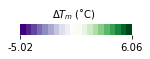

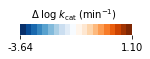

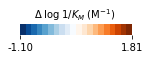

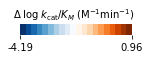

In [11]:
# color bars with log-transformed values 
for nm, label, pos_cmap, neg_cmap in bars:
    
    fig, ax = plt.subplots( 1, 2, figsize=(2,1) ) 
    fig.suptitle( label, fontsize='medium' ) 
    
    pos_max = df['{}'.format(nm)].max()
    neg_max = df['{}'.format(nm)].min()
    
    pos_vals = np.linspace( 0, pos_max, 10 ) 
    neg_vals = np.linspace( abs(neg_max), 0, 10 ) 
    
    ax[0].imshow( np.vstack(2*[neg_vals]), cmap=neg_cmap, extent=(0,10,0,2) ) 
    ax[1].imshow( np.vstack(2*[pos_vals]), cmap=pos_cmap, extent=(0,10,0,2) )
    ax[0].set_xlim( 0, 10 )
    ax[1].set_xlim( 0, 10 ) 
        
    ax[0].set_xticks([0])
    ax[0].set_xticklabels(['{0:2.2f}'.format(neg_max)])
    ax[0].set_yticks([])
    
    ax[1].set_xticks([10])
    ax[1].set_xticklabels(['{0:2.2f}'.format(pos_max)])
    ax[1].set_yticks([])
    
    fig.subplots_adjust( wspace=0, top=1.2 )
    fig.savefig( 'img/legend_{}.png'.format(short_name), dpi=200)
    fig.show()

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


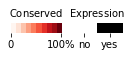

In [12]:
# Colorbars 

# Conservation 

fig, ax = plt.subplots( 1, 2, figsize=(2,1) )     
pos_max = df['{}'.format(nm)].max()
pos_vals = np.linspace( 0, 1, 10 ) 

ax[0].imshow( np.vstack(2*[pos_vals]), cmap=Reds, extent=(0,10,0,2) )
ax[0].set_xlim( 0, 10 )
ax[0].set_xticks([0,10])
ax[0].set_xticklabels(["0","100%"])
ax[0].set_yticks([])
fig.subplots_adjust( wspace=0, top=1.2 )
ax[0].set_title( '$\mathrm{Conserved}$', fontsize='medium' ) 

# Expression 

ax[1].imshow([[.25,1],[.25,1]], cmap=Greys, extent=(0,10,0,2), interpolation='none' )
ax[1].set_xlim( 0, 10 )
ax[1].set_xticks([2.5,7.5])
ax[1].set_xticklabels(["no","yes"])
ax[1].set_yticks([])
ax[1].set_title( '$\mathrm{Expression}$', fontsize='medium' ) 
fig.subplots_adjust( wspace=.2, top=1.2 )

fig.savefig('img/legend_conservation_expression.png', dpi=200)
fig.show()

In [13]:
def color_tm( x, const='tm' ):
    if np.isnan( x ):
        return (0,0,0,0) # transparent cell 
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Greens( x / df['{}'.format(const)].max() )
    else:
        return Purples( x / df['{}'.format(const)].min() ) 

def color_const( x, const ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Oranges( x / df['{}'.format(const)].max() )
    else:
        return Blues( x / df['{}'.format(const)].min() ) 
    
my_list = []
for index, row in df.iterrows():
    my_list.append([
        Greys(row.expression + 0.25), 
        color_tm(row.tm, 'tm'), 
        color_const(row.kcat, 'kcat'),
        color_const(row.km, 'km'),
        color_const(row.kcatkm, 'kcatkm'),
        Reds(row.conserved), 
        Blues(row.distance), 
    ])
    
my_array = np.array(my_list) 

Columns: 6
Mutants per column: 25
Mutants in heat map: 150
Actual number of mutants: 146



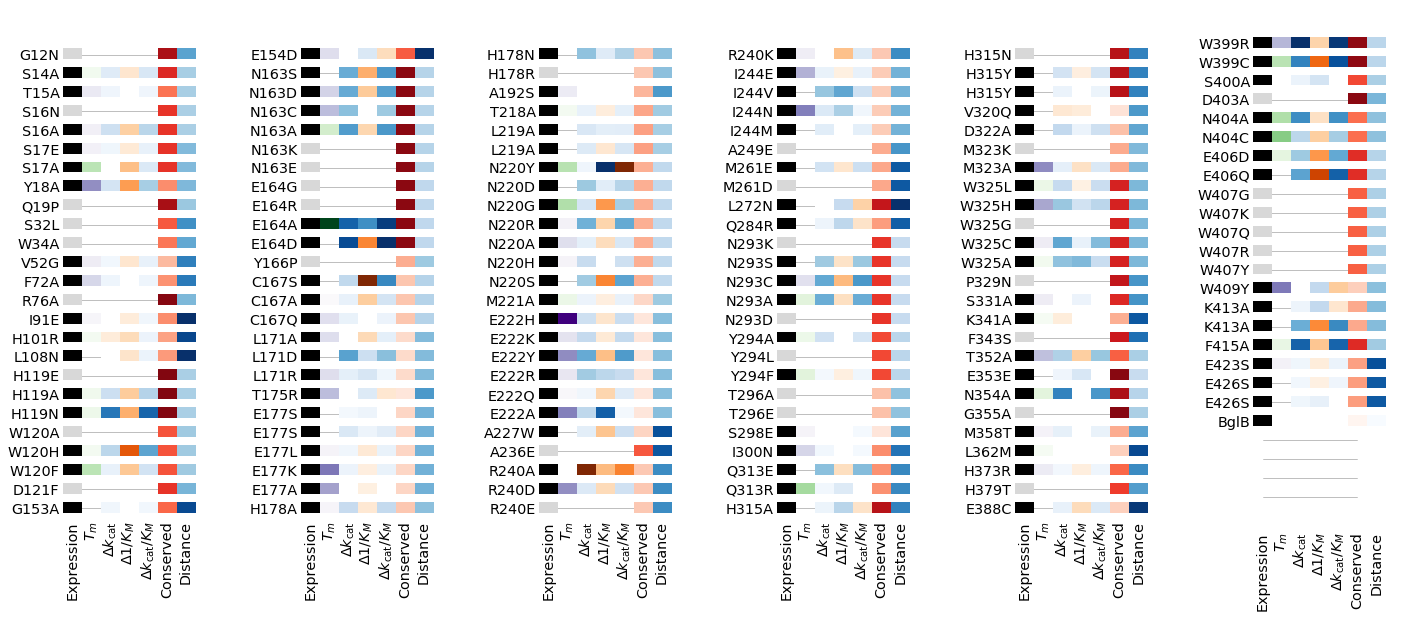

In [14]:
# layout 
cols = 6
c = math.ceil(len( df ) / cols) 
print( 'Columns: {}\nMutants per column: {}\nMutants in heat map: {}\nActual number of mutants: {}\n'.format( cols, c, cols*c, len(df) ) ) 

# heat map figure 
fig, axes = plt.subplots( 1, cols, figsize=(cols * 4, c * 4)) 
for i, ax in enumerate( axes ):
    ax.imshow( X=my_array[i*c:(i*c)+c,:], interpolation='none', origin='upper', aspect='equal', zorder=1 ) 
    index = list( range( len( df ) ) )
    #ax.set_title( 'Effect of mutation\nrelative to native BglB', fontsize='x-large' )
    ax.set_yticks(index[:c]) 
    ax.set_yticklabels(df.index[i*c:(i*c)+c], fontsize='x-large')
    ax.tick_params( length=0 )
    my_labels = ( 'Expression', r'$T_m$', r'$\Delta k_\mathrm{{cat}}$', r'$\Delta 1/K_M$', '$\Delta k_\mathrm{{cat}}/K_M$', 'Conserved', 'Distance' ) 
    ax.set_xticks(range(len(my_labels)))
    ax.set_xticklabels( my_labels, fontsize='x-large', rotation=90 )
    # white lines 
    for i in range( c+1 ):
        ax.plot( (-0.4,7), (i-.55,i-.55), linewidth=8, color='white', zorder=2 ) 
    # black lines 
    for i in range(c):
        ax.plot( (0,5), (i,i), linewidth=0.5, color='gray', zorder=0 ) 

fig.subplots_adjust(wspace=.1*cols,) 
#fig.savefig('img/heat_map.png', dpi=200)
plt.show()

In [15]:
thermal = pandas.read_csv('../data_sets/thermal_targets.csv', index_col=0)
thermal.sample(10)

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,km,kcatkm,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
E406A,406.0,1,40.08,-1.71,0.71,0.86,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,16.0,1,0.15,NaN,NaN,-4.199157,0.553232
I91E,91.0,1,39.66,-0.55,0.32,0.08,846.0,6.71,126071.0,0.79,...,NaN,NaN,NaN,10.0,1,-0.27,-0.017112,-0.127753,-0.139934,0.134796
I244E,244.0,1,37.84,-0.90,0.09,0.06,497.0,5.97,83137.0,1.04,...,NaN,NaN,NaN,1.0,1,-2.09,-0.248126,-0.077004,-0.320755,0.032303
A236E,236.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0,NaN,NaN,NaN,NaN,0.731851
E177K,177.0,1,36.73,-0.70,0.25,0.10,555.0,6.19,89609.0,0.30,...,362.94,36.97,134.18,10.0,1,-3.20,-0.200190,-0.092721,-0.288198,0.106996
S331A,331.0,1,39.29,-0.52,0.33,0.08,817.0,4.34,188306.0,0.11,...,NaN,NaN,NaN,14.0,1,-0.64,-0.032261,0.061480,0.034315,0.045512
N163D,163.0,1,38.52,-0.51,0.30,0.07,12.0,15.19,789.0,1.41,...,NaN,NaN,NaN,3.0,1,-1.41,-1.865301,-0.482588,-2.343472,0.982997
N163A,163.0,1,41.16,-0.50,0.29,0.06,7.0,11.95,558.0,0.91,...,NaN,NaN,NaN,9.0,1,1.23,-2.099385,-0.378398,-2.493915,0.982997
N293K,293.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.0,0,NaN,NaN,NaN,NaN,0.659950


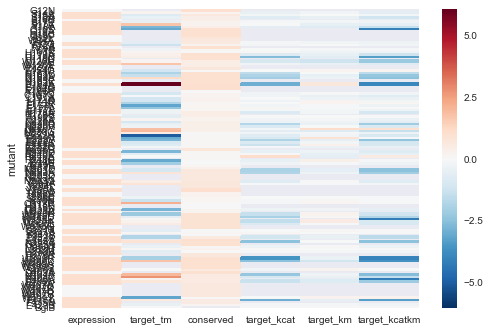

In [16]:
import seaborn as sns 

sns.heatmap(thermal[['expression', 'target_tm', 'conserved', 'target_kcat', 'target_km', 'target_kcatkm']])